# 1. Distances

## 1.1 Euclidean Distance

* Euclidean distance is the straight line distance between 2 data points in a plane.
* It is calculated using the Minkowski Distance formula by setting ‘p’ value to 2, thus, also known as the L2 norm distance metric. The formula is:- sq_rt(Summation(square(xi-yi)))
* This formula is similar to the Pythagorean theorem formula, Thus it is also known as the Pythagorean Theorem.
* Refer "Euclidean_distance.png"

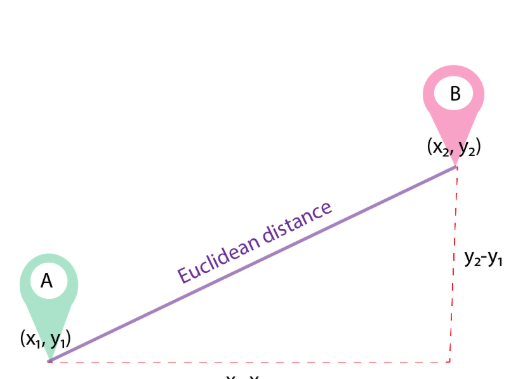

In [5]:
from IPython.display import Image
Image("Euclidean_distance.png")

## 1.2 Manhattan Distance

* We use Manhattan distance, also known as city block distance, or taxicab geometry if we need to calculate the distance between two data points in a grid-like path.

## 1.3 When is Manhattan distance metric preferred in ML?

* L1 distance metric (Manhattan Distance metric) is the most preferable for high dimensional applications.
* Manhattan Distance is preferred over the Euclidean distance metric as the dimension of the data increases. 
* This occurs due to something known as the ‘curse of dimensionality’. 
* For example, if we were to use a Chess dataset, the use of Manhattan distance is more appropriate than Euclidean distance. 
* Another use would be when are interested in knowing the distance between houses which are few blocks apart.
* Manhattan distance generally works only if the points are arranged in the form of a grid and the problem which we are working on gives more priority to the distance between the points only along with the grids, but not the geometric distance.

## 1.4 Hamming DIstance

* Hamming distance is a metric for comparing two binary data strings. 
* Hamming distance is used to measure the distance between categorical variables
* While comparing two binary strings of equal length, Hamming distance is the number of bit positions in which the two bits are different.
* Ex :- Suppose there are two strings 11011001 and 10011101,<br>
11011001 ⊕ 10011101 = 01000100.<br>
Since, this contains two 1s, the Hamming distance, d(11011001, 10011101) = 2.

## 1.5 Cosine Distance & Cosine Similarity

* Cosine distance & Cosine Similarity metric is mainly used to find similarities between two data points.
* As the cosine distance between the data points increases, the cosine similarity, or the amount of similarity decreases, and vice versa.
* Thus, Points closer to each other are more similar than points that are far away from each other. 
* Cosine similarity is given by Cos θ, and cosine distance is 1- Cos θ. 
* Cosine metric is mainly used in Collaborative Filtering based recommendation systems to offer future recommendations to users.
* Taking the example of a movie recommendation system, Suppose one user (User #1) has watched movies like The Fault in our Stars, and The Notebook, which are of romantic genres, and another user (User #2) has watched movies like The Proposal, and Notting Hill, which are also of romantic genres. So the recommendation system will use this data to recommend User #1 to see The Proposal, and Notting Hill as User #1 and User #2 both prefer the romantic genre and its likely that User #1 will like to watch another romantic genre movie and not a horror one.
* (continue) Similarly, Suppose User #1 loves to watch movies based on horror, and User #2 loves the romance genre. In this case, User #2 won’t be suggested to watch a horror movie as there is no similarity between the romantic genre and the horror genre.

# 2. Cross Validation

* Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
* The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.
* Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.
* It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

<b>General Procedure :</b>

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
   a) Take the group as a hold out or test data set
   b) Take the remaining groups as a training data set
   c) Fit a model on the training set and evaluate it on the test set
   d) Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
scores

In [ ]:
from sklearn import metrics
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
scores

In [ ]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
cross_val_score(clf, X, y, cv=cv)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X, y, scoring=scoring)
sorted(scores.keys())
>> ['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']
scores['test_recall_macro']
>> array([0.96..., 1.  ..., 0.96..., 0.96..., 1.        ])

<b>K-fold CV :</b>

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
     print("%s %s" % (train, test))
>>[2 3] [0 1]
>>[0 1] [2 3]

The below is the general method for K-fold CV. This method when called returns best K(optimal K) value.

In [ ]:
# Fuction to compute k value for different algorithms
def k_classifier(X_train, y_train, algorithm):
    # creating odd list of K for KNN
    myList = list(range(0,50))
    neighbors = list(filter(lambda x: x % 2 != 0, myList))

    # empty list that will hold cv scores
    cv_scores = []

    # perform 10-fold cross validation
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k, algorithm = algorithm)
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best k
    best_k = neighbors[MSE.index(min(MSE))]
    print('\nThe best number of neighbors is %d.' % best_k)

    # plot misclassification error vs k 
    plt.plot(neighbors, MSE)

    for xy in zip(neighbors, np.round(MSE,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.title("Misclassification Error vs K")
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()

    print("The misclassification error for each k value is : ", np.round(MSE,3))
    return best_k

In [ ]:
# X input for the model
X = final_20k["CleanedText"]
print("shape of X:", X.shape)

# Y input or Class label for the model
y = final_20k["Score"]
print("shape of y:", y.shape)

# split into train and test
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Train Vectorizor
from sklearn.feature_extraction.text import CountVectorizer 

bag_of_words = CountVectorizer()
X_train = bag_of_words.fit_transform(X_train)

# Test Vectorizor
x_test = bag_of_words.transform(x_test)

# To choose optimal_k using brute force algorithm
best_k_baw = k_classifier(X_train, y_train, "brute")
print("Best k is : ",best_k_baw)

In [ ]:
# To choose optimal_k using "kd tree" force algorithm
best_k_baw_usingKDTree = k_classifier(X_train, y_train, "kd_tree")
print("Best k is : ",best_k_baw_usingKDTree)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
X_train = tf_idf_vect.fit_transform(X_train)

# Convert test text data to its vectorizor
x_test = tf_idf_vect.transform(x_test)
print(x_test.shape)

best_k_tfidf = k_classifier(X_train, y_train, "brute")
print(best_k_tfidf)

# 3. Time and Space complexity of KNN

<b>Time Complexity : </b> : O(nd)<br>
<b>Space Complexity : </b> : O(nd)<br>
where, n->no. of datapoints,<br> 
d -> no. of dimensions

# 4. Overfitting and Underfitting

## 4.1 Overfitting

* Overfitting occurs when a statistical model or machine learning algorithm captures the noise of the data.
* Overfitting occurs when the model or the algorithm fits the data too well.
* Overfitting occurs if the model or algorithm shows low bias but high variance.
* Overfitting is often a result of an excessively complicated model
* It can be prevented by fitting multiple models and using validation or cross-validation to compare their predictive accuracies on test data

## 4.2 Preventing Overfitting

1. Increase training data.
2. Reduce model complexity.
3. Early stopping during the training phase (have an eye over the loss over the training period as soon as loss begins to increase stop training).
4. Use L1 regularization, L2 regularization or elastic net
5. Use dropout for neural networks to tackle overfitting.

## 4.3 Underfitting

* Underfitting occurs when a statistical model or machine learning algorithm cannot capture the underlying trend of the data.
* Intuitively, underfitting occurs when the model or the algorithm does not fit the data well enough.
* Underfitting occurs if the model or algorithm shows low variance but high bias.
* Underfitting is often a result of an excessively simple model.

## 4.4 Preveting Underfitting

1. Increase model complexity
2. Increase number of features, performing feature engineering
3. Remove noise from the data.
4. Increase the number of epochs or increase the duration of training to get better results.

# 5. Handling Imbalanced Dataset

## 5.1 Introduction to Imbalanced Dataset

* Datasets in domains like, fraud detection in banking, real-time bidding in marketing or intrusion detection in networks, fraudsters using credit cards, user clicking advertisement or corrupted server scanning its network etc. are examples of imbalanced dataset.

## 5.2 Techniques handling Imbalanced Dataset

### 5.2.1 Use the right evaluation metrics

1. Applying inappropriate evaluation metrics for model generated using imbalanced data can be dangerous.
2. Evaluation metrics for imbalanced dataset are,<br>
   a) Precision/Specificity: how many selected instances are relevant.<br>
   b) Recall/Sensitivity: how many relevant instances are selected.<br>
   c) F1 score: harmonic mean of precision and recall.<br>
   d) MCC: correlation coefficient between the observed and predicted binary classifications.<br>
   e) AUC: relation between true-positive rate and false positive rate.<br>

### 5.2.2 Resample the training set

1. Apart from using different evaluation criteria, one can also work on getting different dataset.
2. Two approaches to make a balanced dataset out of an imbalanced one are under-sampling and over-sampling.
   a) Under-sampling balances the dataset by reducing the size of the abundant class. This method is used when quantity of data is sufficient. By keeping all samples in the rare class and randomly selecting an equal number of samples in the abundant class, a balanced new dataset can be retrieved for further modelling.
   b) oversampling is used when the quantity of data is insufficient. It tries to balance dataset by increasing the size of rare samples. Rather than getting rid of abundant samples, new rare samples are generated by using e.g. repetition, bootstrapping or SMOTE (Synthetic Minority Over-Sampling Technique).
3. Note that there is no absolute advantage of one resampling method over another. Application of these two methods depends on the use case it applies to and the dataset itself. 

### 5.2.3 Use K-fold Cross-Validation in the right way

* It is noteworthy that cross-validation should be applied properly while using over-sampling method to address imbalance problems.
* Keep in mind that over-sampling takes observed rare samples and applies bootstrapping to generate new random data based on a distribution function. If cross-validation is applied after over-sampling, basically what we are doing is overfitting our model to a specific artificial bootstrapping result. That is why cross-validation should always be done before over-sampling the data, just as how feature selection should be implemented. Only by resampling the data repeatedly, randomness can be introduced into the dataset to make sure that there won’t be an overfitting problem.

### 5.2.4 Ensemble different resampled datasets

* The easiest way to successfully generalize a model is by using more data. The problem is that out-of-the-box classifiers like logistic regression or random forest tend to generalize by discarding the rare class. One easy best practice is building n models that use all the samples of the rare class and n-differing samples of the abundant class. Given that you want to ensemble 10 models, you would keep
* e.g. the 1.000 cases of the rare class and randomly sample 10.000 cases of the abundant class. Then you just split the 10.000 cases in 10 chunks and train 10 different models.
* This approach is simple and perfectly horizontally scalable if you have a lot of data, since you can just train and run your models on different cluster nodes. Ensemble models also tend to generalize better, which makes this approach easy to handle.

### 5.2.5 Resample with different ratios

* The previous approach can be fine-tuned by playing with the ratio between the rare and the abundant class. The best ratio  heavily depends on the data and the models that are used. But instead of training all models with the same ratio in the ensemble, it is worth trying to ensemble different ratios.
* So if 10 models are trained, it might make sense to have a model that has a ratio of 1:1 (rare:abundant) and another one with 1:3, or even 2:1. Depending on the model used this can influence the weight that one class gets.

### 5.2.6 Cluster the abundant class

An elegant approach was proposed by Sergey on Quora. Instead of relying on random samples to cover the variety of the training samples, he suggests clustering the abundant class in r groups, with r being the number of cases in r. For each group, only the medoid (centre of cluster) is kept. The model is then trained with the rare class and the medoids only.

### 5.2.7 Design our own models

* All the previous methods focus on the data and keep the models as a fixed component. But in fact, there is no need to resample the data if the model is suited for imbalanced data. 
* The famous XGBoost is already a good starting point if the classes are not skewed too much, because it internally takes care that the bags it trains on are not imbalanced. But then again, the data is resampled, it is just happening secretly.
* By designing a cost function that is penalizing wrong classification of the rare class more than wrong classifications of the abundant class, it is possible to design many models that naturally generalize in favour of the rare class. For example, tweaking an SVM to penalize wrong classifications of the rare class by the same ratio that this class is underrepresented.

### 5.2.8  FINAL REMARK

This is not an exclusive list of techniques, but rather a starting point to handle imbalanced data. There is no best approach or model suited for all problems and it is strongly recommended to try different techniques and models to evaluate what works best. Try to be creative and combine different approaches. It is also important, to be aware that in many domains (e.g. fraud detection, real-time-bidding), where imbalanced classes occur, the “market-rules” are constantly changing. So, check if past data might have become obsolete.

## 5.3 Imputation

### 5.3.1 Introduction

* Imputation is the process of replacing missing data with substituted values.
* Many real-world datasets may contain missing values for various reasons. They are often encoded as NaNs, blanks or any other placeholders.
* Training a model with a dataset that has a lot of missing values can drastically impact the machine learning model’s quality.
* Some algorithms such as scikit-learn estimators assume that all values are numerical and have and hold meaningful value.
* One way to handle this problem is to get rid of the observations that have missing data. However, you will risk losing data points with valuable information. 

### 5.3.2 Techniques

<b>1. Do Nothing</b>

* You just let the algorithm handle the missing data.
* Some algorithms can factor in the missing values and learn the best imputation values for the missing data based on the training loss reduction (ie. XGBoost). 
* Some others have the option to just ignore them (ie. LightGBM — use_missing=false). 
* However, other algorithms will panic and throw an error complaining about the missing values (ie. Scikit learn — LinearRegression). In that case, you will need to handle the missing data and clean it before feeding it to the algorithm.

<b>2. Imputation Using (Mean/Median) Values</b>

* This works by calculating the mean/median of the non-missing values in a column and then replacing the missing values within each column separately and independently from the others.
* It can only be used with numeric data.
* Doesn’t factor the correlations between features. It only works on the column level.
* Will give poor results on encoded categorical features (do NOT use it on categorical features).
* Not very accurate.
* Doesn’t account for the uncertainty in the imputations.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import random
import numpy as np
random.seed(0)

#Fetching the dataset
import pandas as pd
dataset = fetch_california_housing()
train, target = pd.DataFrame(dataset.data), pd.DataFrame(dataset.target)
train.columns = ['0','1','2','3','4','5','6','7']
train.insert(loc=len(train.columns), column='target', value=target)

#Randomly replace 40% of the first column with NaN values
column = train['0']
print(column.size)
missing_pct = int(column.size * 0.4)
i = [random.choice(range(column.shape[0])) for _ in range(missing_pct)]
column[i] = np.NaN
print(column.shape[0])

#Impute the values using scikit-learn SimpleImpute Class
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(train)
imputed_train_df = imp_mean.transform(train)

<b>3. Imputation Using (Most Frequent) or (Zero/Constant) Values</b>

* Most Frequent is another statistical strategy to impute missing values
* It works with categorical features (strings or numerical representations) by replacing missing data with the most frequent values within each column.
* It also doesn’t factor the correlations between features.
* It can introduce bias in the data.

In [ ]:
#Impute the values using scikit-learn SimpleImpute Class

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(train)
imputed_train_df = imp_mean.transform(train)

* Zero or Constant imputation — as the name suggests — it replaces the missing values with either zero or any constant value you specify

<b>4. Imputation Using k-NN</b>

* The k nearest neighbours is an algorithm that is used for simple classification. The algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. 
* This can be very useful in making predictions about the missing values by finding the k’s closest neighbours to the observation with missing data and then imputing them based on the non-missing values in the neighbourhood.
* Let’s see some example code using Impyute library which provides a simple and easy way to use KNN for imputation:

In [ ]:
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=fast_knn(train.values, k=30)

* It creates a basic mean impute then uses the resulting complete list to construct a KDTree. Then, it uses the resulting KDTree to compute nearest neighbours (NN). After it finds the k-NNs, it takes the weighted average of them.
* Can be much more accurate than the mean, median or most frequent imputation methods (It depends on the dataset).
* Computationally expensive. KNN works by storing the whole training dataset in memory.
* K-NN is quite sensitive to outliers in the data (unlike SVM)

<b>5. Imputation Using Multivariate Imputation by Chained Equation (MICE)</b>

* This type of imputation works by filling the missing data multiple times. Multiple Imputations (MIs) are much better than a single imputation as it measures the uncertainty of the missing values in a better way.
* The chained equations approach is also very flexible and can handle different variables of different data types (ie., continuous or binary) as well as complexities such as bounds or survey skip patterns.

In [ ]:
from impyute.imputation.cs import mice

# start the MICE training
imputed_training=mice(train.values)

<b>6. Imputation Using Deep Learning (Datawig)</b>

* This method works very well with categorical and non-numerical features.
* It is a library that learns Machine Learning models using Deep Neural Networks to impute missing values in a dataframe. 
* It also supports both CPU and GPU for training.

In [ ]:
import datawig

df_train, df_test = datawig.utils.random_split(train)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['1','2','3','4','5','6','7', 'target'], # column(s) containing information about the column we want to impute
    output_column= '0', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train, num_epochs=50)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test)

* Quite accurate compared to other methods.
* It has some functions that can handle categorical data (Feature Encoder).
* Can be quite slow with large datasets.
* We have to specify the columns that contain information about the target column that will be imputed.

<b>Reference :</b>
* Distances : https://medium.com/@kunal_gohrani/different-types-of-distance-metrics-used-in-machine-learning-e9928c5e26c7
* CV and K-fold CV : https://scikit-learn.org/stable/modules/cross_validation.html
* CV : https://towardsdatascience.com/why-and-how-to-cross-validate-a-model-d6424b45261f
* Underfitting and overfitting : https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/
* Handling Imbalanced Dataset : https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html
* Handling Imbalanced Dataset : https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/
* Handling Imbalanced Dataset : https://elitedatascience.com/imbalanced-classes
* Handling Imbalanced Dataset : https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/
* Handling Imbalanced Dataset : https://www.curiousily.com/posts/practical-guide-to-handling-imbalanced-datasets/
* Imputation : https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779
* Imputation : https://scikit-learn.org/stable/modules/impute.html